<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Case_ID             30 non-null     object
 1   Task_ID             30 non-null     object
 2   Task_Description    30 non-null     object
 3   AI_Level            30 non-null     int64 
 4   Time                30 non-null     int64 
 5   Steps               30 non-null     int64 
 6   Explanation Length  30 non-null     int64 
 7   Outcome             30 non-null     int64 
 8   AI_Label            20 non-null     object
dtypes: int64(5), object(4)
memory usage: 2.2+ KB
None
        AI_Level        Time      Steps  Explanation Length    Outcome
count  30.000000   30.000000  30.000000           30.000000  30.000000
mean    1.000000  187.666667  13.233333          473.333333   0.833333
std     0.830455   73.628767   5.076541          286.739499   0.379049
min     0.000000   98.000000   

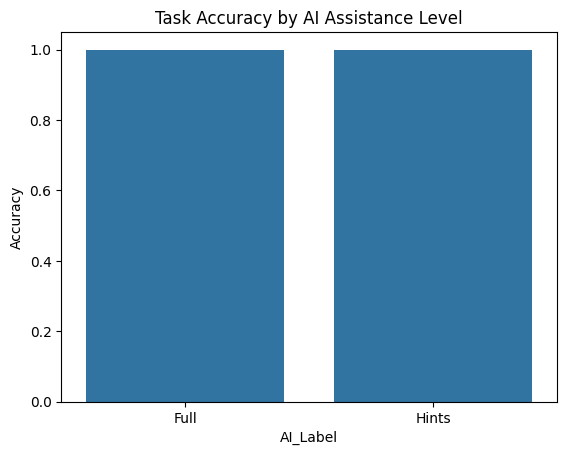

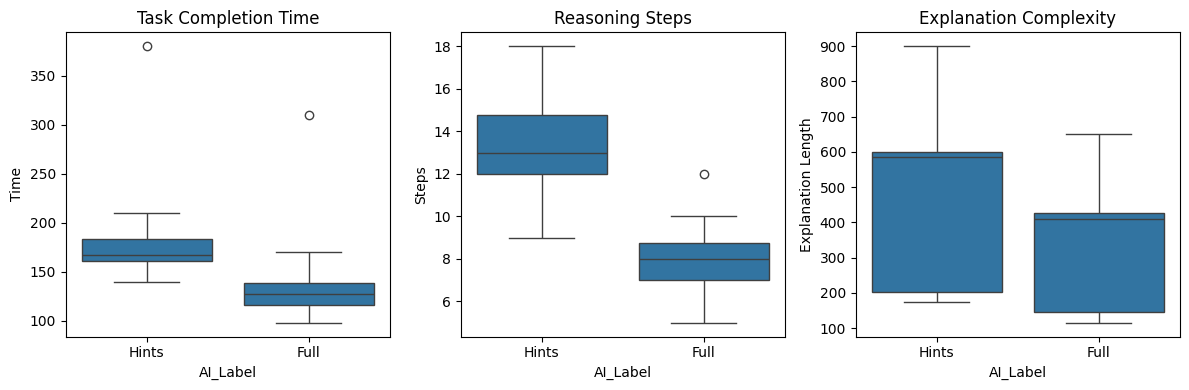

Accuracy: 0.6666666666666666

Confusion Matrix:
 [[1 2]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6


Summary Table:
   AI_Label  Outcome   Time  Steps  Explanation Length
0     Full      1.0  144.8    8.0               330.0
1    Hints      1.0  190.5   13.2               473.0


In [ ]:
!pip install pandas matplotlib seaborn scikit-learn openpyxl
#installing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#uploding the CSV file

df = pd.read_excel('/content/CSV.xlsx')
df.head()

print(df.info())
print(df.describe())
print(df['AI_Label'].value_counts())

#data visualization
#accuracy regarting to AI-levels
accuracy = df.groupby('AI_Label')['Outcome'].mean().reset_index()
sns.barplot(data=accuracy, x='AI_Label', y='Outcome')
plt.ylabel('Accuracy')
plt.title('Task Accuracy by AI Assistance Level')
plt.show()

#Time, Steps, Explanation_Length
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='AI_Label', y='Time')
plt.title('Task Completion Time')
plt.subplot(1,3,2)
sns.boxplot(data=df, x='AI_Label', y='Steps')
plt.title('Reasoning Steps')
plt.subplot(1,3,3)
sns.boxplot(data=df, x='AI_Label', y='Explanation Length') # Corrected column name
plt.title('Explanation Complexity')
plt.tight_layout()
plt.show()


#preparing data for ML
X = df[['AI_Level', 'Time', 'Steps', 'Explanation Length']] # Corrected column name
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
summary_table = df.groupby('AI_Label').agg({
    'Outcome':'mean',
    'Time':'mean',
    'Steps':'mean',
    'Explanation Length':'mean' # Corrected column name
}).reset_index()
print("\nSummary Table:\n", summary_table)